# Assignment 5: Parametric versus non-parametric tests. What works better for empirical research

---
## Background

### Problem Analysis
The assignment asks to evaluate parametric and non-parametric tests on 

### What are the methods' use case?
Both methods types are used in inferential statistics, which aims to draw conclusion about a population based on some given data.
Application's can for example be:
- Understand the relation between two variables
- Test the significance between of the relation between multiple variables
- Testing of hypotheses

### The Methods
##### Box Plots
Box plots represent the distribution of a dataset based on five horizontal lines. The box itself spans the interquartile range (IQR), which is the middle 50% of the data. So the lower horizontal line describes the first quartile (the lowest 25% of the data). The middle horizontal line describes the median, so the point that divides the dataset in half. The upper horizontal line is the third quartile describing 75% of the data. In addition, outside of this box, there are two further horizontal lines (whiskers). Those describe the minimum and maximum (accepted) values within 1.5 times the IQR (first and the third quartile). Every value in the data that is below the lower whisker or above the upper whisker is considered as outlier and drawn as a point.

**Assumptions**  
- The data has to be at least ordinal

##### Two Sample T-Test
The two-sample t-test is used to determine if two population means are significantly different. It is commonly used when comparing the means from two different groups.

**Assumptions**  
- The data is continuous
- The data follows a normal distribution
- The variances of the two populations are equal
- The samples are independent of each other

##### Chi-Squared Test
The chi-squared test is used to determine if there is a significant association between two categorical variables. We can also use ordinal data for this, however at the loss of the ordinal information. The loss of information can impact the classification. However, since I know that people will use the Mann-Whitney U Test I'm trying out the chi-squared test.

**Assumptions**  
- The data is categorical or we lose information
- The samples are independent
- The expected frequency count for each cell of the table should be at least 5

---
## Solution

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np


df = pd.read_csv('data/table_5.csv', delimiter=";")
df.head()

,Prog. language,Program size (LOC),Development time (minutes),Total number of defects,Number of test defects
0,A,1408,3949,89,23
1,A,1529,2061,69,16
2,A,946,3869,170,41
3,A,1141,5562,271,55
4,A,696,5028,103,39


#### 5.1 Boxplots 
Create a box plot for each variable in dependence of the programming language

<Axes: title={'center': 'Number of test defects'}, xlabel='Prog. language'>

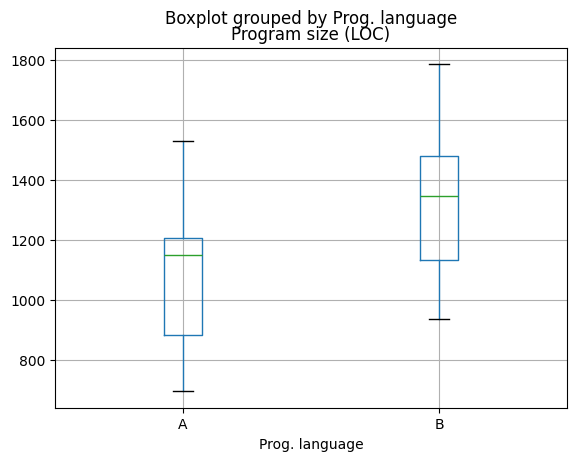

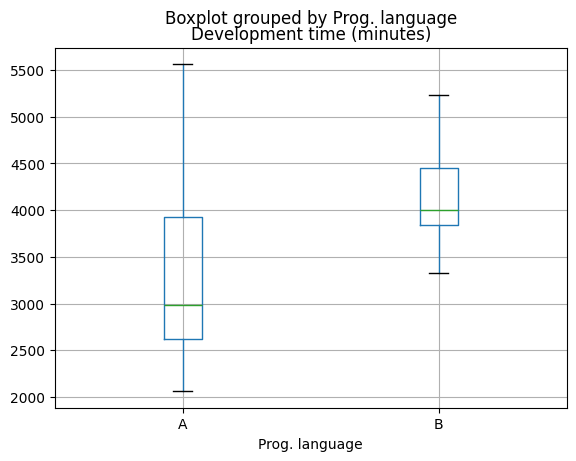

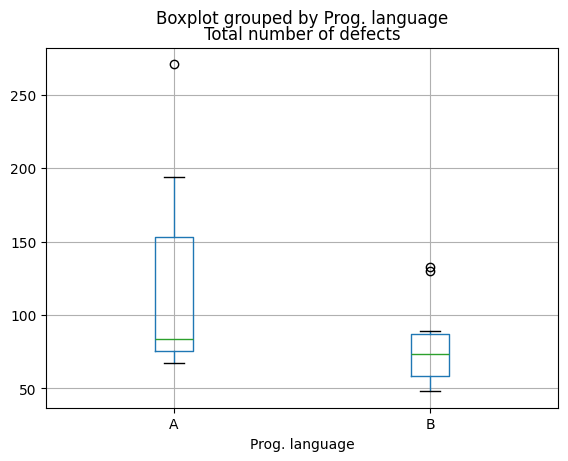

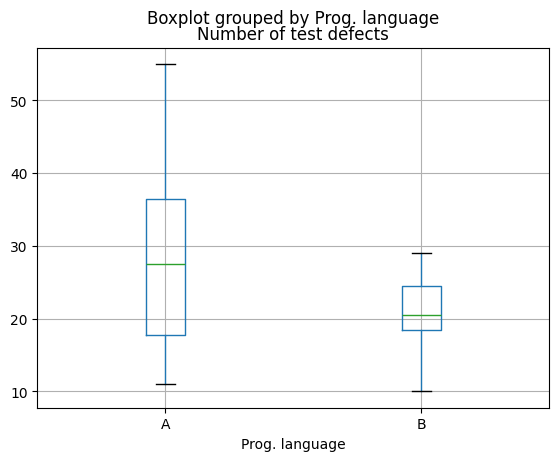

In [2]:
df.boxplot(column=['Program size (LOC)'], by='Prog. language')
df.boxplot(column=['Development time (minutes)'], by='Prog. language')
df.boxplot(column=['Total number of defects'], by='Prog. language')
df.boxplot(column=['Number of test defects'], by='Prog. language')

**Interpretation `Program Size`**
- Programs written in language A tend to be smaller than those written in language B
- Programs written in language B are not smaller than 900 lines, while those in language A already start at 700 lines
- Reasons might be, that language A is more concise, and that developers are more proficient in language B, thus write longer programs in language B
- For both the variance is similar big
- No outliers found

**Interpretation `Development time`**
- All in all programs written in language A are written faster
- Development time in language B starts almost at the third quartile of language A, hinting towards a long setup time
- There is a higher variance in language A than language B (especially when looking at the whiskers), which could point to highly varying skill levels in development language A compare to language B
- No outliers found

**Interpretation `Total number of defects`**
- While the median of both language is similar, the variance for A (especially towards more defects) is higher
- There are two outliers for language B and one outlier for language A. Given the data sparcity and the high variance for language A I would not remove those outliers
- In general, there is more defects with language A than language B, which could be caused by the different proficiency levels in the old vs. new language

**Interpretation `Number of test defects`**
- While the lower whisker and the first quartile are similar, the medians highly differ
- With programming language A the median number of defects is almost as high as the upper whiskeer of language B
- The variance for language A is high, reaching up to over 50 defects while language B stops at under 30
- In general, there is more defects with language A than language B, which could be caused by the different proficiency levels in the old vs. new language
- No outliers found

#### 5.2 Parametric tests
We aim to understand if the two variables are statistically significantly different with a two sample t-test.
The null hypothesis is, that the two variables in question are not statistically significant different (with the implication, that the programming language has no impact on any of the variables). 

In [3]:
# perform two sample t-test for each variable to check if the programming language has an effect on the variable
for column in df.columns[1:]:
    t, p = stats.ttest_ind(df[df['Prog. language'] == 'A'][column], df[df['Prog. language'] == 'B'][column])
    print(f"t-test for {column}: t-statistics={t}, p-value = {p}")

t-test for Program size (LOC): t-statistics=-1.8673195986978237, p-value = 0.0782295012712296
t-test for Development time (minutes): t-statistics=-1.8924993071033034, p-value = 0.07462056343718114
t-test for Total number of defects: t-statistics=1.6466002387642908, p-value = 0.11698738041662458
t-test for Number of test defects: t-statistics=1.6162491474190053, p-value = 0.12343135306659707


**Interpretation**
- Since all p values are higher than 0.05 (confidence value) we can not reject the null hypothesis, that the two variables are significantly different
- However, `Program size` and `Development time` have rather low p values indicating a slight difference
- A better way of determining their relevance would be confidence intervals

#### 5.3 Non-Parametric test
Same setup at 5.2, just that we employ the chi squared test for the independence testing.

In [4]:
# perform chi-squared test for each variable to check if the programming language has an effect on the variable
for col in df.columns[1:]:
    chi2, p, dof, ex = stats.chi2_contingency(pd.crosstab(df['Prog. language'], df[col]))
    print(f"Chi-squared test for {col}: p-value = {p}")

Chi-squared test for Program size (LOC): p-value = 0.394578182086001
Chi-squared test for Development time (minutes): p-value = 0.394578182086001
Chi-squared test for Total number of defects: p-value = 0.5238349258623264
Chi-squared test for Number of test defects: p-value = 0.4276837812897381


As this results in very shitty values I also run the mann-whitney u test (without explaining it above).

In [5]:
# perform the Mann-Whitney U Test for each variable to check if the programming language has an effect on the variable
for col in df.columns[1:]:
    u, p = stats.mannwhitneyu(df[df['Prog. language'] == 'A'][col], df[df['Prog. language'] == 'B'][col])
    print(f"Mann-Whitney U Test for {col}: U-statistics={u}, p-value = {p}")

Mann-Whitney U Test for Program size (LOC): U-statistics=28.0, p-value = 0.10410988966022681
Mann-Whitney U Test for Development time (minutes): U-statistics=26.0, p-value = 0.07566157214388704
Mann-Whitney U Test for Total number of defects: U-statistics=70.0, p-value = 0.1401665724324623
Mann-Whitney U Test for Number of test defects: U-statistics=66.5, p-value = 0.22542674492729098


**Interpretation**
- Also with the chi-squared test we could not find any variables for whom we could reject the null hypothesis
- Hence the program selection has not impact on the respective variables

#### 5.4 Evaluation/Considerations
Lets start by checking for the normality constraint

In [6]:
for col in df.columns[1:]:
    stat, p = stats.shapiro(df[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('{} looks normal distributed (fail to reject H0 because p-value is greater than alpha)'.format(col))
    else:
        print('{} does not look normal distributed (reject H0 because p-value is less than alpha)'.format(col))

Statistics=0.982, p=0.955
Program size (LOC) looks normal distributed (fail to reject H0 because p-value is greater than alpha)
Statistics=0.969, p=0.738
Development time (minutes) looks normal distributed (fail to reject H0 because p-value is greater than alpha)
Statistics=0.768, p=0.000
Total number of defects does not look normal distributed (reject H0 because p-value is less than alpha)
Statistics=0.915, p=0.079
Number of test defects looks normal distributed (fail to reject H0 because p-value is greater than alpha)


**Interpetation**
- All variables except `Total number of defects` are normal distributed.
- Hence I would suggest to use non-parametric methods to apply the same method to all variables

First of all, no the conclusions will probably not hold, as we introduce bias independent of how we assign languages to programmers.

However, whether this bias impacts the study in an unwanted way depends on the studies goals, on how the study is performed and also on the context of the project.

The overall study goal is to find out if language A is better than language B. For that purpose we measured 4 variables. Letting developers choose their language themself without any instructions makes it difficult to control the outcomes. For example the motivation for using language A could be curiosity about a new language (no skill with language A), or personal preference based on existing experience (existing skills with language A). Hence we can not draw conclusions about the less favorable variable values for language A since we don't know if they stem from lacking skill or a caused by the language itself. On the other hand if we assign randomly assign programmers to a language we introduce bias as we don't know the programmers stance towards that language, which could impact all of the variables.

There is many more aspects to this question, but for the sake of our both sanity I'll stop with this part :)

Also the question of whether the effect is big enough to make the switch depends (not considering statistical significance)
1. How high are the existing costs?
    - If development cost is high, even small improvements accumulate over time. In the end, the costs need to be armortize otherwise it doesn't make sense
2. What are causes for the better/worse performance?
    - If the causes for worse performance of language A are in the developers experience with the language, will the amount of defects go down over time?
    - If the causes for worse performance of language A are in the language itself, will this change over time because the community is already working on it?

Without this information we can not make a statement.

#### 5.5 Confidence Intervals
Here we want to find the confidence intervals for the difference of the means

In [7]:
def compute_confidence_interval(group1, group2, alpha=0.05):
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group1, group2)
    # Calculate the mean and standard error of the difference
    mean_diff = np.mean(group1) - np.mean(group2)
    se_diff = np.sqrt(np.var(group1, ddof=1)/len(group1) + np.var(group2, ddof=1)/len(group2))    
    # Calculate the confidence interval
    confidence_interval = stats.t.interval(1-alpha, df=(len(group1) + len(group2) - 2), loc=mean_diff, scale=se_diff)
    
    return t_stat, p_value, confidence_interval

for col in list(df.columns)[1:]:
    t_stat, p_value, conf_int = compute_confidence_interval(
        df[df['Prog. language'] == 'A'][col],
        df[df['Prog. language'] == 'B'][col]
    )
    print(f"t-test for {col}: p-value = {p_value}, 95% CI = {conf_int}")

t-test for Program size (LOC): p-value = 0.0782295012712296, 95% CI = (-483.4603425616717, 28.460342561671723)
t-test for Development time (minutes): p-value = 0.07462056343718114, 95% CI = (-1644.0030176170014, 85.80301761700161)
t-test for Total number of defects: p-value = 0.11698738041662458, 95% CI = (-10.815870299673165, 89.21587029967317)
t-test for Number of test defects: p-value = 0.12343135306659707, 95% CI = (-2.2790508451800715, 17.47905084518007)


#### Summary
The confidence intervals add valuable information for the variable `Program size` and `Development time`, as in both cases the p-value was close to 0.05 making it difficult to decide whether an effect (the program language has an impact on the variable) was given or not. Through the confidence intervals we could see 1) that the intervals are huge, so we can't estimate the effect well. This might change with more data. 2) that the intervals contain 0, which hints towards no effect at all.